<a href="https://colab.research.google.com/github/ankitstar01/DeepLearning/blob/master/StockPrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM

In [9]:
def get_stock_data(stock_name, normalized=0):
    url="http://www.google.com/finance/historical?q="+stock_name+"&startdate=Jul+12%2C+2013&enddate=Jul+11%2C+2017&num=30&ei=rCtlWZGSFN3KsQHwrqWQCw&output=csv"


    col_names = ['Open','Low','High','Volume','Close']
    stocks = pd.read_csv("GOOGL.csv", header=0, names=col_names) 
    df = pd.DataFrame(stocks)
    df.drop(df.columns[[1,3]], axis=1, inplace=True) 
    return df

In [10]:
stock_name = 'GOOGL'
df = get_stock_data(stock_name,0)
df.head()

,Open,High,Close
0,573.39,588.3000,571.50
1,578.55,579.7173,545.25
2,544.79,549.8500,540.63
3,545.05,559.8800,557.51
4,565.84,567.8000,567.04


In [11]:
today = datetime.date.today()
file_name = stock_name+'_stock_%s.csv' % today
df.to_csv(file_name)

In [24]:

df['High'] = df['High'] / 1000
df['Open'] = df['Open'] / 1000
df['Close'] = df['Close'] / 1000
df.head(5)
def norm(df):
  df['High'] = df['High'] / 1000
  df['Open'] = df['Open'] / 1000
  df['Close'] = df['Close'] / 1000

def prepare_df(ticker):
  df=get_stock_data(ticker,0)
  norm(df)
  return df

In [13]:
def load_data(stock, seq_len):
    amount_of_features = len(stock.columns)
    data = stock.to_numpy() #pd.DataFrame(stock)
    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])

    result = np.array(result)
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    x_train = train[:, :-1]
    y_train = train[:, -1][:,-1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1][:,-1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], amount_of_features))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], amount_of_features))  

    return [x_train, y_train, x_test, y_test]

In [14]:
def build_model(layers):
    model = Sequential()

    model.add(LSTM(
        input_dim=layers[0],
        output_dim=layers[1],
        return_sequences=True))
    model.add(Dropout(0.2))

    model.add(LSTM(
        layers[2],
        return_sequences=False))
    model.add(Dropout(0.2))

    model.add(Dense(
        output_dim=layers[2]))
    model.add(Activation("linear"))

    start = time.time()
    model.compile(loss="mse", optimizer="rmsprop",metrics=['accuracy'])
    print("Compilation Time : ", time.time() - start)
    return model

def build_model2(layers):
        d = 0.2
        model = Sequential()
        model.add(LSTM(128, input_shape=(layers[1], layers[0]), return_sequences=True))
        model.add(Dropout(d))
        model.add(LSTM(64, input_shape=(layers[1], layers[0]), return_sequences=False))
        model.add(Dropout(d))
        model.add(Dense(16,kernel_initializer='uniform',activation='relu'))        
        model.add(Dense(1,kernel_initializer='uniform',activation='relu'))
        model.compile(loss='mse',optimizer='adam',metrics=['accuracy'])
        return model

In [15]:
window = 5
X_train, y_train, X_test, y_test = load_data(df[::-1], window)
print("X_train", X_train.shape)
print("y_train", y_train.shape)
print("X_test", X_test.shape)
print("y_test", y_test.shape)

X_train (1531, 5, 3)
y_train (1531,)
X_test (170, 5, 3)
y_test (170,)


In [16]:

# model = build_model([3,lag,1])
model = build_model2([3,window,1])

In [17]:

model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=500,
    validation_split=0.1,
    verbose=0)

In [18]:
trainScore = model.evaluate(X_train, y_train, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

testScore = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))


Train Score: 0.00 MSE (0.03 RMSE)
Test Score: 0.00 MSE (0.06 RMSE)


In [19]:
diff=[]
ratio=[]
p = model.predict(X_test)
for u in range(len(y_test)):
    pr = p[u][0]
    ratio.append((y_test[u]/pr)-1)
    diff.append(abs(y_test[u]- pr))

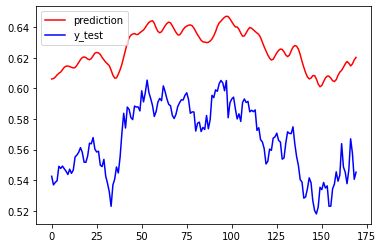

In [20]:
def plot(X_test,y_test):
  diff=[]
  ratio=[]
  p = model.predict(X_test)
  for u in range(len(y_test)):
      pr = p[u][0]
      ratio.append((y_test[u]/pr)-1)
      diff.append(abs(y_test[u]- pr))
  plt2.plot(p,color='red', label='prediction')
  plt2.plot(y_test,color='blue', label='y_test')
  plt2.legend(loc='upper left')
  plt2.show()

import matplotlib.pyplot as plt2

plt2.plot(p,color='red', label='prediction')
plt2.plot(y_test,color='blue', label='y_test')
plt2.legend(loc='upper left')
plt2.show()




In [7]:

import tweepy
from textblob import TextBlob

def get_polarity(sentence):
  analysis=TextBlob(sentence)
  print(analysis.polarity)
# # Step 1 - Authenticate
# consumer_key= 'CONSUMER_KEY_HERE'
# consumer_secret= 'CONSUMER_SECRET_HERE'

# access_token='ACCESS_TOKEN_HERE'
# access_token_secret='ACCESS_TOKEN_SECRET_HERE'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_token_secret)

# api = tweepy.API(auth)

# #Step 3 - Retrieve Tweets
# public_tweets = api.search('Trump')



#CHALLENGE - Instead of printing out each tweet, save each Tweet to a CSV file
#and label each one as either 'positive' or 'negative', depending on the sentiment 
#You can decide the sentiment polarity threshold yourself

public_tweets=["this is very bad move by google","reliace gets huge investment from google","new crona strain may effect the market"]
for tweet in public_tweets:
    print(tweet)
    
    #Step 4 Perform Sentiment Analysis on Tweets
    analysis = TextBlob(tweet)
    print(analysis.sentiment)
    print(analysis.polarity)
    print("")

this is very bad move by google
Sentiment(polarity=-0.9099999999999998, subjectivity=0.8666666666666667)
-0.9099999999999998

reliace gets huge investment from google
Sentiment(polarity=0.4000000000000001, subjectivity=0.9)
0.4000000000000001

new crona strain may effect the market
Sentiment(polarity=0.13636363636363635, subjectivity=0.45454545454545453)
0.13636363636363635



In [8]:
get_polarity("market welcomes new budget.")

0.13636363636363635


data is collected
model training started
model is trained
Train Score: 0.00 MSE (0.03 RMSE)
Test Score: 0.00 MSE (0.04 RMSE)


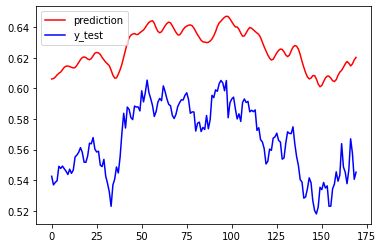

In [25]:
def Prepare_model(ticker):
  df=prepare_df(ticker)
  print("data is collected")
  window = 5
  X_train, y_train, X_test, y_test = load_data(df[::-1], window)
  model = build_model2([3,window,1])
  print("model training started")
  model.fit(
    X_train,
    y_train,
    batch_size=512,
    epochs=500,
    validation_split=0.1,
    verbose=0)
  print("model is trained")
  trainScore = model.evaluate(X_train, y_train, verbose=0)
  print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))

  testScore = model.evaluate(X_test, y_test, verbose=0)
  print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
  plot(X_test,y_test)
Prepare_model("GOOGL")

Standard data set for checking sentiments of stocks market   https://github.com/krishnaik06/Stock-Sentiment-Analysis

In [7]:
! pip install polygon-api-client
from polygon import RESTClient, WebSocketClient, STOCKS_CLUSTER

API_KEY = 'vqeohd8x5k1x6PKiisJQS8RgS3A1iRQC'
!mkdir ticker_folder

def load_previous_data(ticker, api_key, multiplier, timespan):  # timespan must be day, hour, minute, week, month, quarter or year
    f = open('ticker_folder/' + ticker + '.csv', 'w')  # multiplier would mulitply timespan. If you want every 5 minutes multiplier will have to be 5
    with RESTClient(api_key) as client:
        resp = client.stocks_equities_aggregates(ticker=ticker, multiplier=multiplier, timespan=timespan,
                                                 from_='2021-02-02', to='2021-02-03', sort='asc',
                                                 limit=50000)
        resp = resp.results
        f.write('o,l,h,v,c\n')
        for query in resp:
            f.write(str(query['o']) + ',' + str(query['l']) + ','
                    + str(query['h']) + ',' + str(query['v']) + ',' + str(query['c']) + '\n')
        f.close()
load_previous_data('GOOGL',API_KEY,1,'minutes')
pd.read_csv('ticker_folder/GOOGL.csv')

mkdir: cannot create directory ‘ticker_folder’: File exists


HTTPError: ignored